In [ ]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





In [ ]:
grid_res=read.csv('../data/wg20220316/common_variants_chr18-23_grid_opt.csv')

In [ ]:
grid_res$CHR=as.integer(substr(grid_res$CHR, 4, nchar(grid_res$CHR)))

In [ ]:
nrow(grid_res[grid_res$LOD>3.3,])

[1] 4893

In [ ]:
nrow(grid_res)

[1] 620179

In [ ]:
4893/620179

[1] 0.007889658

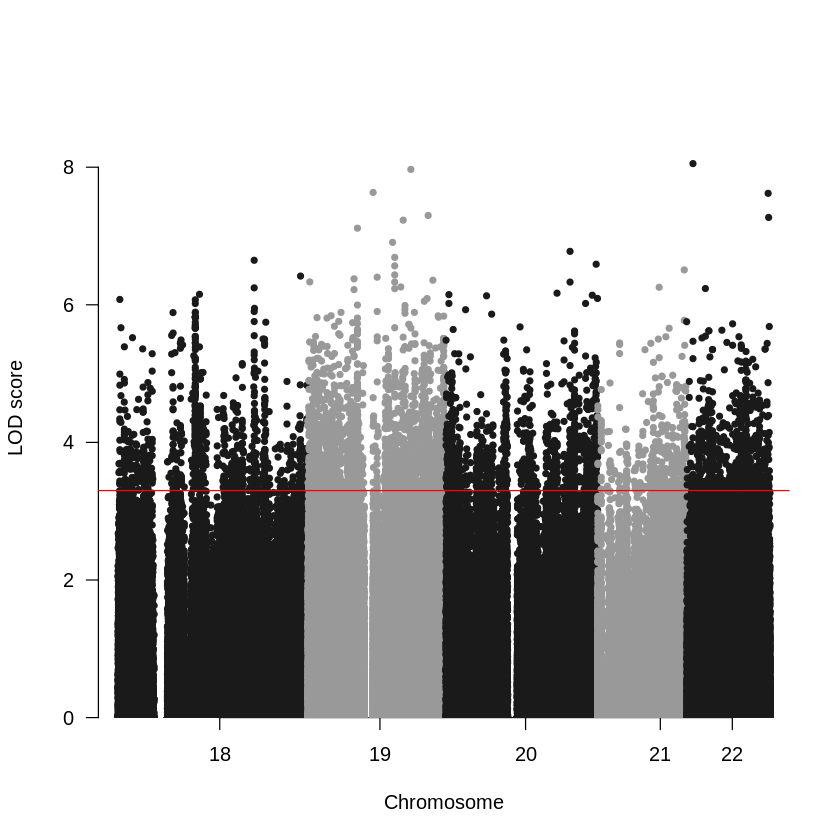

In [ ]:
manhattan(grid_res, chr="CHR", bp="POS", snp="SNP", p="LOD",suggestiveline = 0,genomewideline = 3.3,logp = FALSE,ylab = "LOD score")

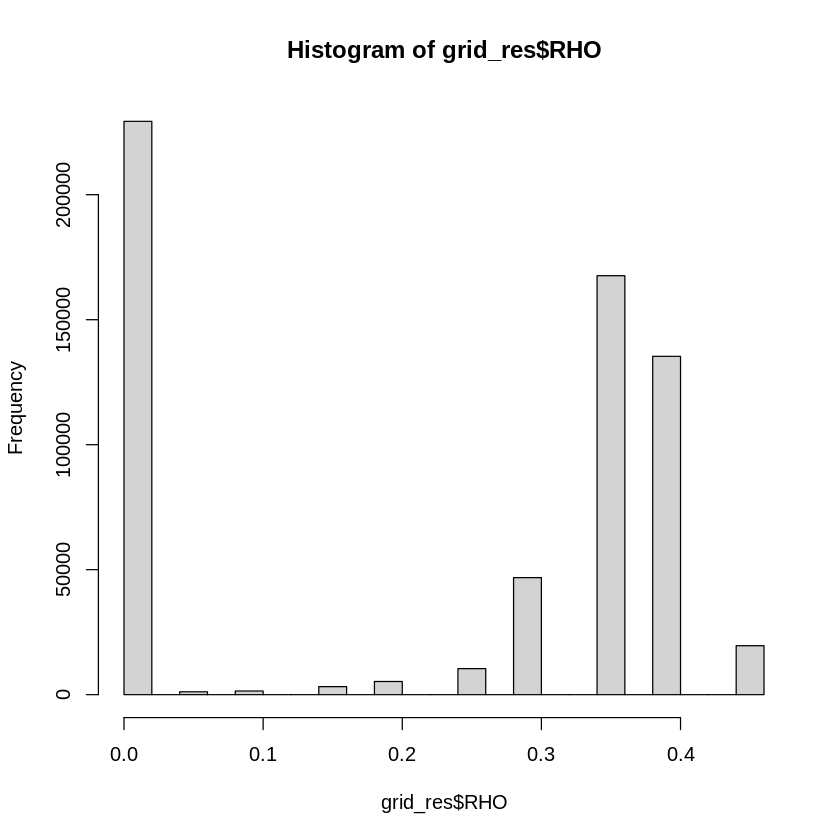

In [ ]:
hist(grid_res$RHO)

In [ ]:
sum(grid_res$RHO<0.1)

[1] 230489

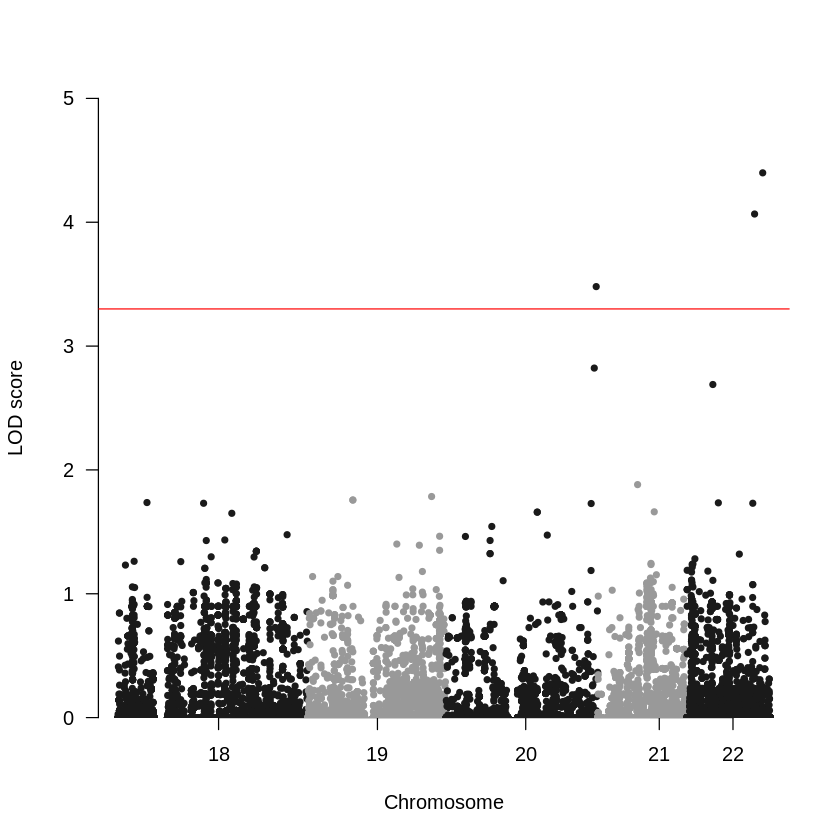

In [ ]:
manhattan(grid_res[grid_res$RHO<0.1,], chr="CHR", bp="POS", snp="SNP", p="LOD",suggestiveline = 0,genomewideline = 3.3,logp = FALSE,ylab = "LOD score")

In [ ]:
grid_res[grid_res$RHO<0.1 & grid_res$LOD>3.3,]

,CHR,POS,A0,A1,SNP,LOD,RHO
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
444057,20,63571534,A,G,chr20:63571534:A:G,3.480287,0.05
602371,22,44263080,T,TTTCTTTC,chr22:44263080:T:TTTCTTTC,4.066467,0.05
611181,22,47697736,A,C,chr22:47697736:A:C,4.398866,0.05


### LOD vs HLOD

In [ ]:
grid_chr22=grid_res[grid_res$CHR==22,]
grid_chr22=grid_chr22[!duplicated(grid_chr22$SNP),]
row.names(grid_chr22)=grid_chr22$SNP

In [ ]:
sum(grid_chr22$LOD>3.3)

[1] 687

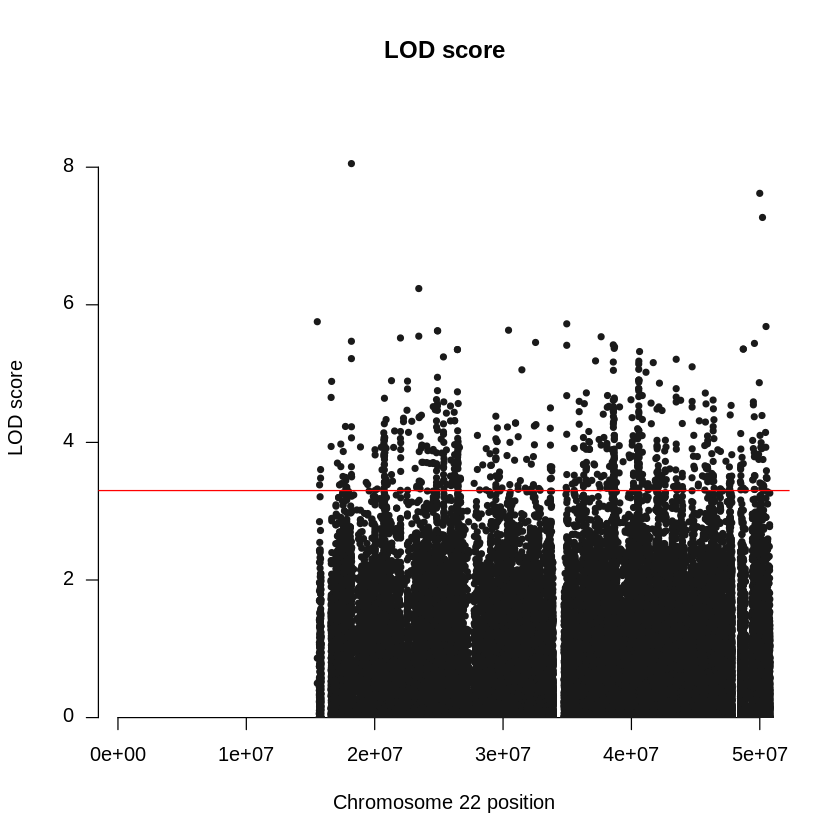

In [ ]:
manhattan(grid_chr22, chr="CHR", bp="POS", snp="SNP", p="LOD",suggestiveline = 0,genomewideline = 3.3,logp = FALSE,ylab = "LOD score",main="LOD score")

In [ ]:
hlod_res=read.csv('../data/wg20220316/common_variants_chr22_besthlod.csv',header = FALSE,row.names = 1)
colnames(hlod_res)=c('Theta','Alpha','HLOD')
variants=row.names(hlod_res)
row.names(hlod_res)=substr(variants,0, nchar(variants)-3)

In [ ]:
hlod_res=cbind(grid_chr22[row.names(hlod_res),1:5],hlod_res)

In [ ]:
sum(hlod_res$HLOD>3.3)

[1] 823

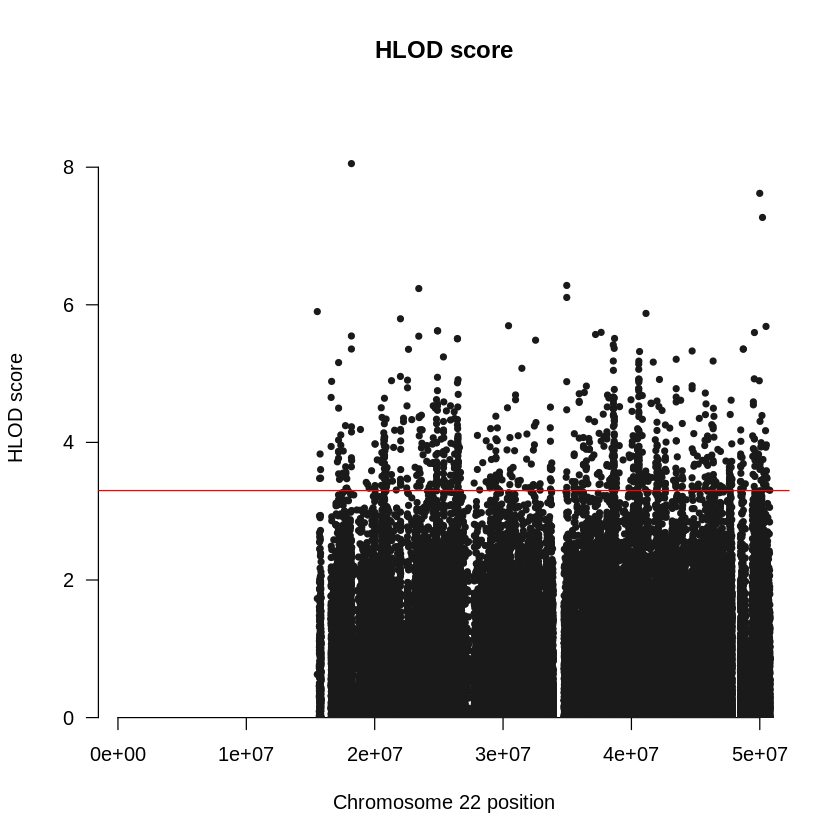

In [ ]:
manhattan(hlod_res, chr="CHR", bp="POS", snp="SNP", p="HLOD",suggestiveline = 0,genomewideline = 3.3,logp = FALSE,ylab = "HLOD score",main="HLOD score")

### Haplotypes with vs without imputation

In [ ]:
unimp_res=read.csv('../data/wg20220316/common_variants_chr22_unimputed_lods.csv',header = TRUE,row.names = 1)

In [ ]:
imp_res=read.csv('../data/wg20220316/common_variants_chr22_imputed_lods.csv',header = TRUE,row.names = 1)

In [ ]:
grid_chr22=grid_chr22[row.names(hlod_res),]

In [ ]:
grid_chr22$LODimp=apply(imp_res,1,max)

In [ ]:
grid_chr22$LODun=apply(unimp_res,1,max)

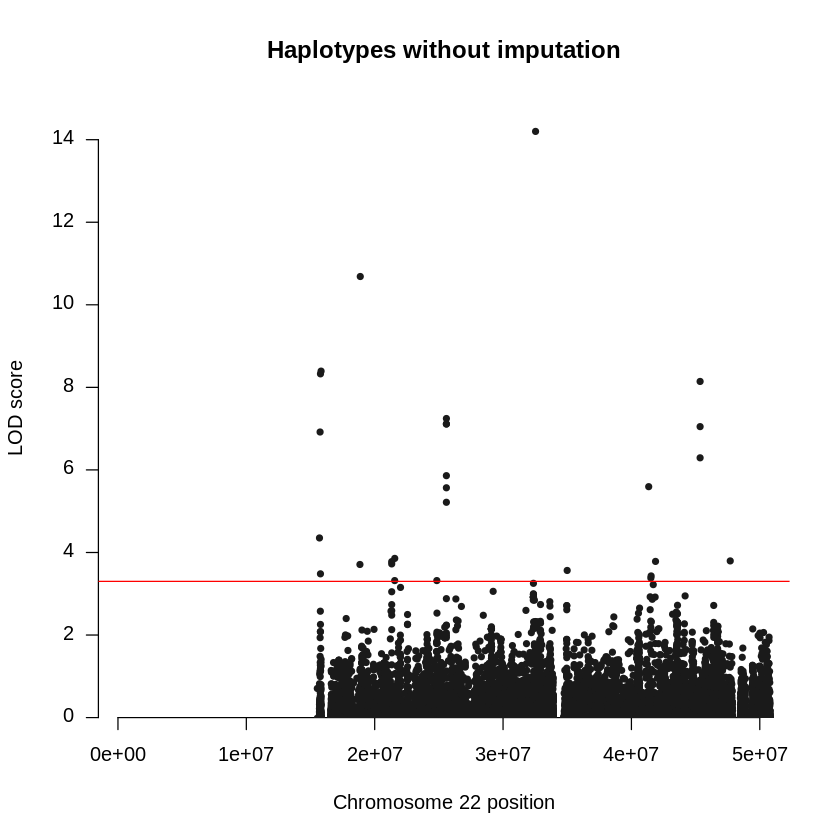

In [ ]:
manhattan(grid_chr22, chr="CHR", bp="POS", snp="SNP", p="LODun",suggestiveline = 0,genomewideline = 3.3,logp = FALSE,ylab = "LOD score",main='Haplotypes without imputation')

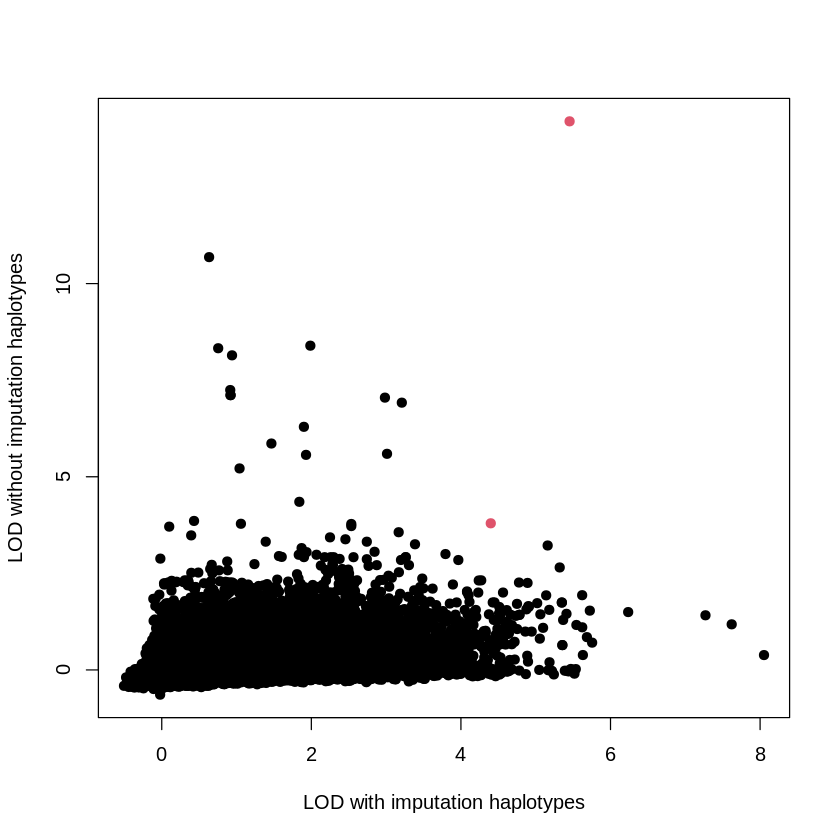

In [ ]:
plot(grid_chr22$LODimp,grid_chr22$LODun,col = as.numeric(grid_chr22$LODimp>3.3 & grid_chr22$LODun>3.3)+1,pch=19,xlab="LOD with imputation haplotypes", ylab="LOD without imputation haplotypes")

In [ ]:
grid_chr22[grid_chr22$LODimp>3.3 & grid_chr22$LODun>3.3,]

,CHR,POS,A0,A1,SNP,LOD,RHO,LODimp,LODun
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr22:32532265:G:A,22,32532265,G,A,chr22:32532265:G:A,5.452885,0.20,5.452885,14.200435
chr22:47697736:A:C,22,47697736,A,C,chr22:47697736:A:C,4.398866,0.05,4.398866,3.795548


### HLOD without imputation haplotypes

In [ ]:
hlod_unimp=read.csv('../data/wg20220316/common_variants_chr22_unimp_besthlod.csv',header = FALSE,row.names = 1)
colnames(hlod_unimp)=c('Theta','Alpha','HLOD')

In [ ]:
row.names(hlod_unimp)=substr(variants,0, nchar(variants)-3)

In [ ]:
hlod_unimp=cbind(grid_chr22,hlod_unimp)

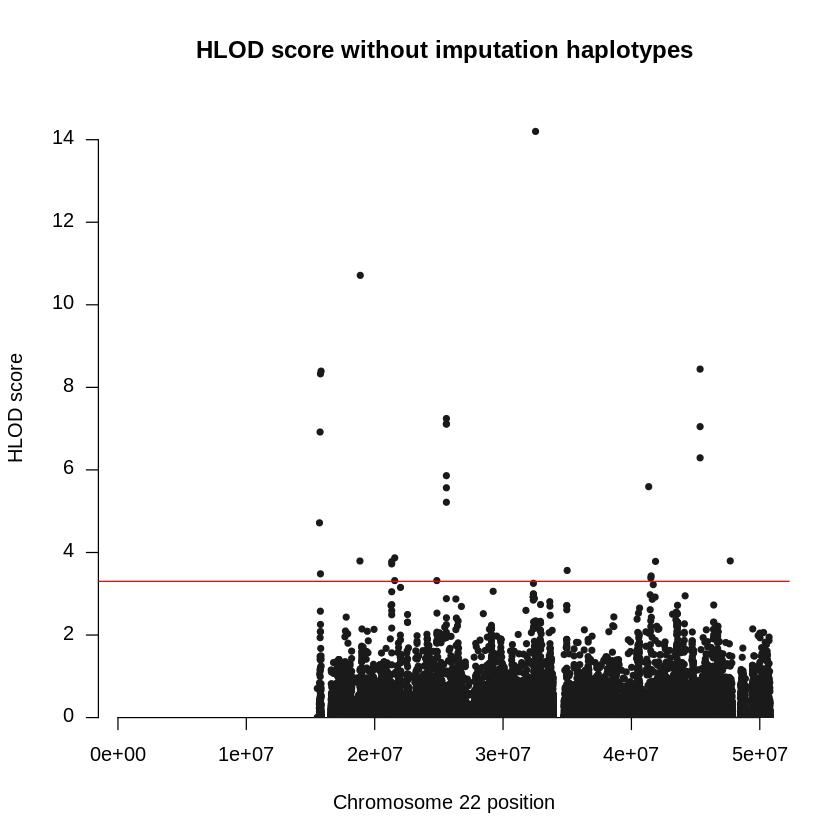

In [ ]:
manhattan(hlod_unimp, chr="CHR", bp="POS", snp="SNP", p="HLOD",suggestiveline = 0,genomewideline = 3.3,logp = FALSE,ylab = "HLOD score",main="HLOD score without imputation haplotypes")

In [ ]:
sum(hlod_unimp$HLOD>3.3)

[1] 28

In [ ]:
sum(hlod_unimp$LODun>3.3)

[1] 28

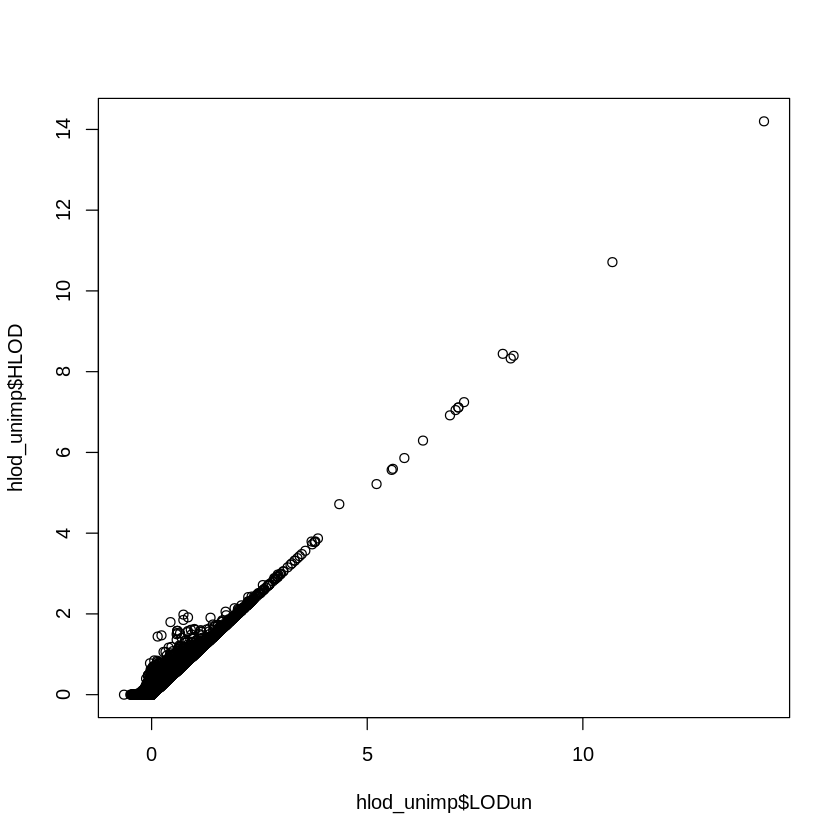

In [ ]:
plot(hlod_unimp$LODun,hlod_unimp$HLOD)

In [ ]:
hlod_unimp[hlod_unimp$HLOD>3.3,]

,CHR,POS,A0,A1,SNP,LOD,RHO,LODimp,LODun,Theta,Alpha,HLOD
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
chr22:15698895:C:A,22,15698895,C,A,chr22:15698895:C:A,1.83943716,0.30,1.83943716,4.351754,LOD0.0,0.6503491,4.718445
chr22:15746033:T:C,22,15746033,T,C,chr22:15746033:T:C,3.20969498,0.25,3.20969498,6.918465,LOD0.1,1.0000000,6.918465
chr22:15774734:T:G,22,15774734,T,G,chr22:15774734:T:G,0.39351108,0.35,0.39351108,3.482726,LOD0.15,1.0000000,3.482726
chr22:15775793:G:A,22,15775793,G,A,chr22:15775793:G:A,0.75465403,0.30,0.75465403,8.327158,LOD0.05,1.0000000,8.327158
chr22:15823448:G:A,22,15823448,G,A,chr22:15823448:G:A,1.98680637,0.30,1.98680637,8.393338,LOD0.05,1.0000000,8.393338
chr22:18850435:C:T,22,18850435,C,T,chr22:18850435:C:T,0.09979611,0.35,0.09979611,3.709249,LOD0.1,0.7811039,3.793151
chr22:18876007:T:G,22,18876007,T,G,chr22:18876007:T:G,0.63322765,0.30,0.63322765,10.685351,LOD0.0,0.9605784,10.713316
chr22:21326399:A:G,22,21326399,A,G,chr22:21326399:A:G,2.53408107,0.30,2.53408107,3.723100,LOD0.2,1.0000000,3.723100
chr22:21326400:A:T,22,21326400,A,T,chr22:21326400:A:T,2.53408107,0.30,2.53408107,3.778138,LOD0.2,1.0000000,3.778138


### LOD without imputation haplotypes (plug-in afreq)

In [ ]:
unimp_res1=read.csv('../data/wg20220316/common_variants_chr22_unimputed_lods_afreq.csv',header = TRUE,row.names = 1)

In [ ]:
variants=row.names(unimp_res1)
row.names(unimp_res1)=substr(variants,0, nchar(variants)-3)

In [ ]:
head(unimp_res1)

,LOD0.0,LOD0.05,LOD0.1,LOD0.15,LOD0.2,LOD0.25,LOD0.3,LOD0.35,LOD0.4,LOD0.45
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr22:15528179:G:T,-33.27534,-20.84448,-13.47098,-8.450897,-4.996025,-2.704249,-1.2945309,-0.5268439,-0.1793950,-0.05367149
chr22:15528424:T:C,-56.58866,-39.19668,-27.36517,-18.689514,-12.289069,-7.647198,-4.3969353,-2.2397285,-0.9178479,-0.21865197
chr22:15528913:C:T,-62.35390,-32.58352,-19.16686,-10.877403,-5.580128,-2.333573,-0.5637205,0.1711362,0.2683654,0.10471217
chr22:15690112:C:T,-53.04289,-30.94843,-20.28023,-13.342486,-8.547326,-5.220080,-2.9727988,-1.5298197,-0.6680633,-0.20284353
chr22:15690174:G:C,-73.83822,-43.82755,-29.20080,-19.625714,-12.941206,-8.207137,-4.8907481,-2.6368594,-1.1859595,-0.34773768
chr22:15690808:C:A,-68.48792,-41.02980,-27.02262,-17.841708,-11.469892,-7.026469,-4.0037331,-2.0464937,-0.8728466,-0.24893569


In [ ]:
grid_chr22=grid_chr22[row.names(unimp_res1),]

In [ ]:
grid_chr22$LODafreq=apply(unimp_res1,1,max)

In [ ]:
sum(grid_chr22$LODafreq>3.3)

[1] 1213

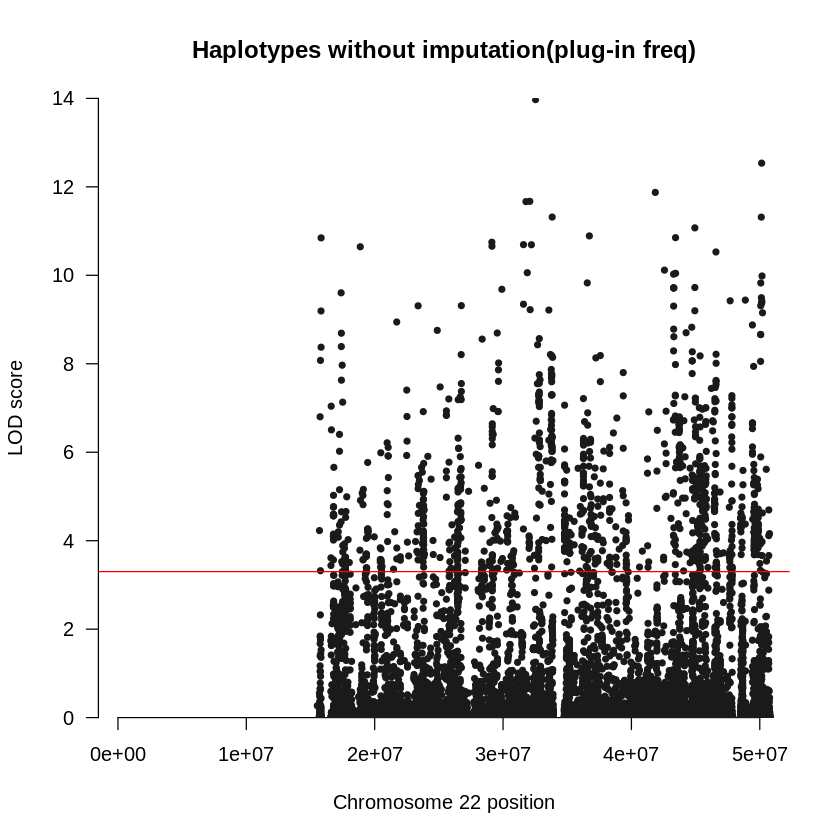

In [ ]:
manhattan(grid_chr22, chr="CHR", bp="POS", snp="SNP", p="LODafreq",suggestiveline = 0,genomewideline = 3.3,logp = FALSE,ylab = "LOD score",main='Haplotypes without imputation(plug-in freq)')

In [ ]:
grid_chr22[grid_chr22$LODafreq>10,]

,CHR,POS,A0,A1,SNP,LOD,RHO,LODimp,LODun,LODimpafreq,LODafreq
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr22:15825513:T:C,22,15825513,T,C,chr22:15825513:T:C,0.5828361,0.35,0.5828361,1.4102286,10.84674,10.84674
chr22:18876007:T:G,22,18876007,T,G,chr22:18876007:T:G,0.6332276,0.30,0.6332276,10.6853506,10.64543,10.64543
chr22:29127216:C:G,22,29127216,C,G,chr22:29127216:C:G,0.4688483,0.35,0.4688483,0.4047548,10.74808,10.74808
chr22:29134967:A:G,22,29134967,A,G,chr22:29134967:A:G,0.1697274,0.40,0.1697274,0.7156677,10.65836,10.65836
chr22:31589790:A:T,22,31589790,A,T,chr22:31589790:A:T,0.2290484,0.40,0.2290484,0.8850487,10.69323,10.69323
chr22:31781222:C:A,22,31781222,C,A,chr22:31781222:C:A,2.4941594,0.30,2.4941594,2.5972950,11.66649,11.66649
chr22:31885582:A:G,22,31885582,A,G,chr22:31885582:A:G,0.5729167,0.35,0.5729167,1.4595238,10.05861,10.05861
chr22:32082985:A:AG,22,32082985,A,AG,chr22:32082985:A:AG,1.1134166,0.30,1.1134166,0.5249284,11.67192,11.67192
chr22:32208512:C:A,22,32208512,C,A,chr22:32208512:C:A,0.4610661,0.35,0.4610661,0.3825340,10.69134,10.69134


### LOD from genotypes (plug-in afreq)

In [ ]:
unimp_res2=read.csv('../data/wg20220419//common_variants_chr22_unimputed_lods_afreq.csv',header = TRUE,row.names = 1)

In [ ]:
variants=row.names(unimp_res2)
row.names(unimp_res2)=substr(variants,0, nchar(variants)-3)

In [ ]:
head(unimp_res2)

,LOD0.0,LOD0.05,LOD0.1,LOD0.15,LOD0.2,LOD0.25,LOD0.3,LOD0.35,LOD0.4,LOD0.45
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr22:15528179:G:T,-32.86531,-20.71865,-13.47756,-8.518814,-5.084669,-2.789123,-1.3617502,-0.570685961,-0.2009101,-0.05936196
chr22:15528424:T:C,-56.32622,-38.99783,-27.21627,-18.580362,-12.211651,-7.594933,-4.3642181,-2.221629258,-0.9098968,-0.21667779
chr22:15528913:C:T,-57.17088,-30.15872,-17.91860,-10.315593,-5.431766,-2.412424,-0.7333102,0.007738353,0.1671332,0.07388366
chr22:15690112:C:T,-43.94425,-25.22390,-16.31835,-10.576501,-6.649572,-3.963524,-2.1863383,-1.079455943,-0.4473370,-0.12685144
chr22:15690174:G:C,-57.81788,-33.48675,-22.00474,-14.586083,-9.470016,-5.899936,-3.4438406,-1.810807238,-0.7872989,-0.21696427
chr22:15690808:C:A,-60.90132,-36.15330,-23.71409,-15.598202,-9.990757,-6.097378,-3.4584264,-1.753202751,-0.7313161,-0.19354706


In [ ]:
head(grid_chr22)

,CHR,POS,A0,A1,SNP,LOD,RHO,LODimp,LODun,LODimpafreq,LODafreq,LODafreq0,LODgeno
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr22:15528179:G:T,22,15528179,G,T,chr22:15528179:G:T,0.8643534,0.35,0.8643534,-0.01622567,-0.05367149,-0.05367149,-33.27534,-0.05936196
chr22:15528424:T:C,22,15528424,T,C,chr22:15528424:T:C,0.4990697,0.35,0.4990697,-0.07851636,-0.21865197,-0.21865197,-56.58866,-0.21667779
chr22:15528913:C:T,22,15528913,C,T,chr22:15528913:C:T,5.7542610,0.30,5.7542610,0.70655744,0.26836536,0.26836536,-62.35390,0.16713317
chr22:15690112:C:T,22,15690112,C,T,chr22:15690112:C:T,0.0000000,0.00,-0.1219609,-0.10056399,-0.20284353,-0.20284353,-53.04289,-0.12685144
chr22:15690174:G:C,22,15690174,G,C,chr22:15690174:G:C,0.0000000,0.00,-0.1331114,-0.25675503,-0.34773768,-0.34773768,-73.83822,-0.21696427
chr22:15690808:C:A,22,15690808,C,A,chr22:15690808:C:A,0.0000000,0.00,-0.1235237,-0.15740792,-0.24893569,-0.24893569,-68.48792,-0.19354706


In [ ]:
unimp_res2=unimp_res2[row.names(grid_chr22),]

In [ ]:
grid_chr22$LODgeno=apply(unimp_res2,1,max)

In [ ]:
grid_chr22$LODgeno[is.na(grid_chr22$LODgeno)]=0

In [ ]:
sum(grid_chr22$LODgeno>3.3)

[1] 1168

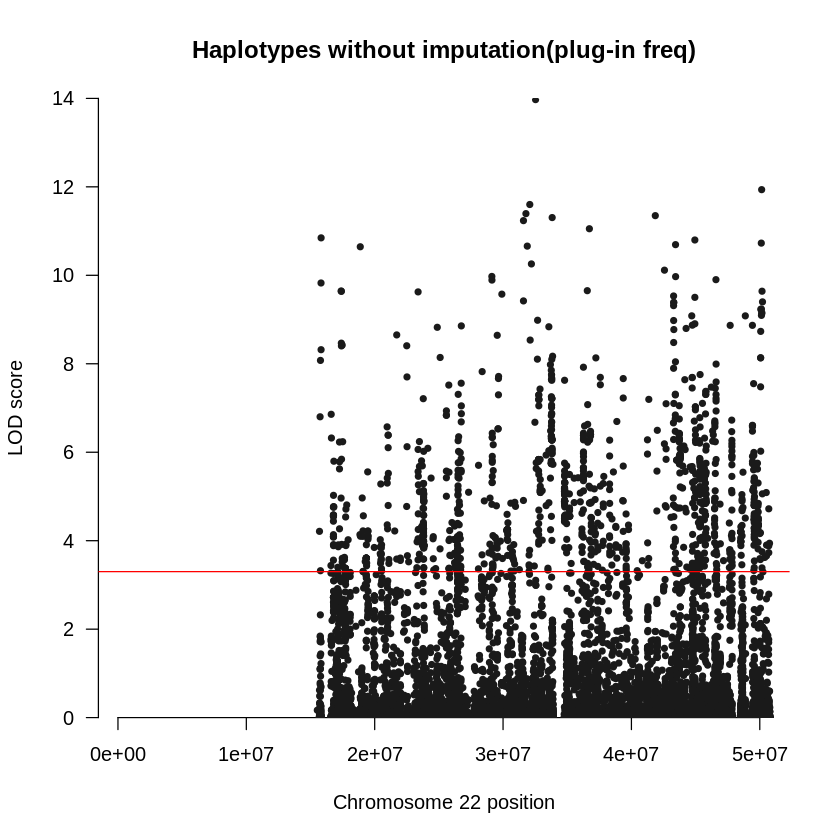

In [ ]:
manhattan(grid_chr22, chr="CHR", bp="POS", snp="SNP", p="LODgeno",suggestiveline = 0,genomewideline = 3.3,logp = FALSE,ylab = "LOD score",main='Haplotypes without imputation(plug-in freq)')

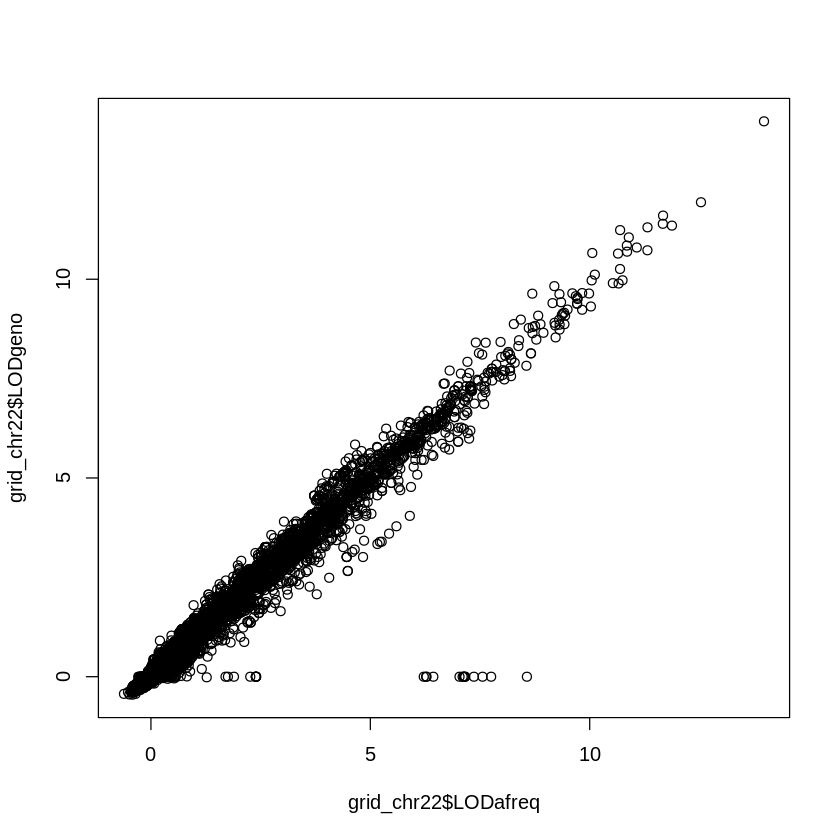

In [ ]:
plot(grid_chr22$LODafreq,grid_chr22$LODgeno)